**DSS - Causal Inference for Business Decisions: Understanding Cause and Effect**

- Part of Causal Inference in Python
- Course Length: 12 Hours
- Last Updated: November 2024
- Author: Hamam Wulan Ayu

---


- Developed by [Algoritma](https://algorit.ma/)'s product division and instructors team

## Learning Output

![](assets/Causal_Inference_for_Business_Decisions.png)

- **Introduction to Causal Inference**  
  - Correlation vs Causation
  - Common pitfalls: confounding, bias, and spurious correlations
- **Randomized Controlled Trials (RCTs)**
  - Understanding Causal Effects in Controlled Experiments
- **Causal Diagram and Directed Acyclic Graph (DAG)**
  - Introduction to DAG
  - Variables in Causal Diagram
- **Matching**
  - Distance Matching
  - Propensity Score Matching
- **Difference in Difference**
  - Using Simple Mean calculation
  - Using Regression
- **Instrumental Variable**
  - Using Two-Stage Least Square

# Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import causaldata 
from causalgraphicalmodels import CausalGraphicalModel
import warnings
warnings.simplefilter("ignore", FutureWarning)

# Causality

> Hubungan sebab akibat

## Motivation

Ada banyak pertanyaan bisnis yang hanya bisa dijawab dengan dengan hubungan sebab-akibat. Hubungan sebab-akibat dapat menjelaskan mengapa suatu hal terjadi, bukan hanya melihat berdasarkan hubungan korelasi saja.

### Contoh Permasalahan

- Pengaruh Perubahan Desain Aplikasi Mobile Banking terhadap Jumlah Transaksi: Apakah perubahan desain aplikasi mobile banking yang lebih user-friendly dapat meningkatkan jumlah transaksi yang dilakukan nasabah melalui aplikasi tersebut? [Referensi](http://erepository.uonbi.ac.ke/handle/11295/164110)
- Pengaruh Perubahan Tarif Biaya Transaksi terhadap Tingkat Penggunaan Kartu Kredit: Apakah kenaikan tarif biaya transaksi akan mengurangi penggunaan kartu kredit oleh nasabah? [Referensi](https://www.sciencedirect.com/science/article/abs/pii/S0169207011000082)
- Efektivitas Penawaran Produk Asuransi Bundling terhadap Penjualan Asuransi: Apakah menawarkan produk asuransi secara bundling dengan produk perbankan lainnya dapat meningkatkan penjualan produk asuransi? [Referensi](https://www.sciencedirect.com/science/article/abs/pii/S0169207011000082)

## Causality vs Causation

- Kausalitas: Hubungan sebab-akibat. Satu peristiwa menyebabkan peristiwa lain. Misal, kejadian A menyebabkan kejadian B
- Korelasi: Hubungan antara dua variabel, tapi belum tentu sebab-akibat. Misal, A dan B sering terjadi bersamaan, tapi belum tentu A menyebabkan B.

**Contoh kasus:**

| Contoh Kasus | (+) Kausalitas | (-) Kausalitas |
|---|---|---|
| **(+) Korelasi** | [Penjualan jaket meningkat ketika suhu semakin menurun](https://www.researchgate.net/publication/262897858_The_relationship_between_temperature_and_sales_Sales_data_analysis_of_a_retailer_of_branded_women's_business_wear) | [Tingkat konsumsi margarin berkorelasi dengan tingkat perceraian di Maine](https://www.tylervigen.com/spurious/correlation/5920_per-capita-consumption-of-margarine_correlates-with_the-divorce-rate-in-maine) |
| **(-) Korelasi** | [Tingkat pertumbuhan tanaman dengan banyak air yang diberikan](https://go.graphpad.com/video/when-causation-exists-without-correlation) | Tinggi badan dan warna mata |


*Another spurious correlation*: https://www.tylervigen.com/spurious-correlations 

# Causal Inference

*Causal Inference* adalah metode untuk mengestimasi efek kausal satu variabel terhadap variabel lain, dengan mempertimbangkan keberadaan variabel lain yang mempengaruhi (confonding factors) yang coba untuk tetap 'dikontrol'.

## Randomized Controlled Trial

RCT (Randomized Controlled Trial) adalah sebuah metode eksperimental yang digunakan untuk mengevaluasi efektivitas suatu perlakuan (treatment). Dalam RCT, partisipan penelitian secara acak (randomly) dibagi ke dalam dua kelompok atau lebih: satu kelompok mendapatkan intervensi atau perlakuan, sedangkan kelompok lain berfungsi sebagai kelompok kontrol dan mungkin menerima plasebo atau tidak mendapatkan intervensi sama sekali.

**Central Limit Theorem**

> Semakin bertambahnya jumlah sampel yang diambil secara acak, maka **distribusi rata-rata sampel** akan mengikuti distribusi normal

[Animasi CLT](https://seeing-theory.brown.edu/probability-distributions/index.html)

Hasil dari RCT adalah data eksperimental yang dapat digunakan pada causal inference sebagai *gold standard*. Data eksperimental mempunyai unsur randomisasi dan sample yang cukup banyak, sehingga menghilangkan bias dalam data.

Steps:

1. Definisikan Tujuan dan Hipotesis Kausal
2. Identifikasi Populasi Target
3. Pilih partisipan dengan random sampling 
4. Split partisipan menjadi dua kelompok, 
    - kelompok yang mendapatkan perlakuan (treatment group) 
    - kelompok yang tidak mendapatkan perlakuan (control group)
5. Lakukan eksperimen dengan kurun waktu yang sudah ditentukan
6. Bandingan statistik kelompok Treatment dengan kelompok Control

### Example Case: [Job Training on Earnings in 1978 (LaLonde Study)](https://www.jstor.org/stable/1806062)

Studi LaLonde (1986) menilai dampak dari program pelatihan kerja (*job_training*) terhadap pendapatan (*real earnings*) pada tahun 1978. Data yang digunakan mencakup orang yang di-assign ke program pelatihan kerja secara acak, yang menjadikannya sebagai **data eksperimen**. Selain itu, terdapat juga data lain yang merupakan data observasional, di mana individu sendiri yang sebagian besar menentukan apakah mereka akan berpartisipasi dalam pelatihan kerja. Pada data eksperimen, karena program pelatihan kerja ditugaskan secara random, kita dapat mengetahui rata-rata efek perlakuan dari job_training terhadap real earnings.

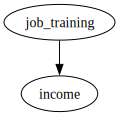

In [3]:
lalonde_dag = CausalGraphicalModel(nodes = ["job_training", "income"],
                                   edges = [("job_training", "income")])

lalonde_dag.draw()

**Load Data**

In [4]:
experiment_data = causaldata.nsw_mixtape.load_pandas().data
experiment_data.head()

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1,37,11,1,0,1,1,0.0,0.0,9930.045898
1,Dehejia-Wahba Sample,1,22,9,0,1,0,1,0.0,0.0,3595.894043
2,Dehejia-Wahba Sample,1,30,12,1,0,0,0,0.0,0.0,24909.449219
3,Dehejia-Wahba Sample,1,27,11,1,0,0,1,0.0,0.0,7506.145996
4,Dehejia-Wahba Sample,1,33,8,1,0,0,1,0.0,0.0,289.789886


**Data Description**

- `treat`: the treatment assignment 
    + 1=treated 
    + 0=control

- `age`: age in years.

- `educ`: education in number of years of schooling.

- `black`: indicator for African-American (1=African-American, 0=not).

- `hisp`:  an indicator for being of Hispanic origin (1=Hispanic, 0=not).

- `married`: an indicator for married (1=married, 0=not married).

- `nodegree`: an indicator for whether the individual has a high school degree (1=no degree, 0=degree).

- `re74`: income/real earnings in 1974, in U.S. dollars.

- `re75`: income/real earnings in 1975, in U.S. dollars.

- `re78`: income/real earnings in 1978, in U.S. dollars.

*"treat"is the treatment variable, "re78" is the outcome, and the others are pre-treatment covariates.*

In [5]:
print(causaldata.nsw_mixtape.NOTE)
print("-------")
print(causaldata.nsw_mixtape.DESCRLONG)
print("-------")
print(causaldata.nsw_mixtape.SOURCE)

::
    Number of observations - 445
    Number of variables - 11
    Variables name definitions::
            data_id - Individual ID
            treat - In the National Supported Work Demonstration Job Training Program
            age - Age in years
            educ - Years of education
            black - Race: Black
            hisp - Ethnicity: Hispanic
            marr - Married
            nodegree - Has no degree
            re74 - Real earnings 1974 
            re75 - Real earnings 1975
            re78 - Real earnings 1978

-------
Data from the National Supported Work Demonstration (NSW) job-training program experiment, where those treated were guaranteed a job for 9-18 months. This data is used in the Matching and Subclassification chapter of Causal Inference: The Mixtape by Cunningham.
-------

Lalonde, Robert. 1986. “Evaluating the Econometric Evaluations of Training Programs with Experimental Data.” American Economic Review 76 (4): 604–20.
Dehejia, Rajeev, and Sadek Wahb

In [6]:
experiment_data

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1,37,11,1,0,1,1,0.000000,0.000000,9930.045898
1,Dehejia-Wahba Sample,1,22,9,0,1,0,1,0.000000,0.000000,3595.894043
2,Dehejia-Wahba Sample,1,30,12,1,0,0,0,0.000000,0.000000,24909.449219
3,Dehejia-Wahba Sample,1,27,11,1,0,0,1,0.000000,0.000000,7506.145996
4,Dehejia-Wahba Sample,1,33,8,1,0,0,1,0.000000,0.000000,289.789886
...,...,...,...,...,...,...,...,...,...,...,...
440,Dehejia-Wahba Sample,0,21,9,1,0,0,1,31886.429688,12357.219727,0.000000
441,Dehejia-Wahba Sample,0,28,11,1,0,0,1,17491.449219,13371.250000,0.000000
442,Dehejia-Wahba Sample,0,29,9,0,1,0,1,9594.307617,16341.160156,16900.300781
443,Dehejia-Wahba Sample,0,25,9,1,0,1,1,24731.619141,16946.630859,7343.963867


In [7]:
kolom_cat = ['treat', 'black', 'hisp', 'nodegree']
experiment_data[kolom_cat] = experiment_data[kolom_cat].astype('category')

**Exploratory Data Analysis**

In [8]:
experiment_data['treat'].value_counts()

treat
0    260
1    185
Name: count, dtype: int64

In [9]:
experiment_data.describe()

,age,educ,marr,re74,re75,re78
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,25.370787,10.195506,0.168539,2102.265381,1377.138306,5300.764160
std,7.100282,1.792119,0.374766,5363.582520,3150.960693,6631.491699
min,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,10.000000,0.000000,0.000000,0.000000,3701.812012
75%,28.000000,11.000000,0.000000,824.388916,1220.836060,8124.714844
max,55.000000,16.000000,1.000000,39570.679688,25142.240234,60307.929688


In [10]:
experiment_data[experiment_data.treat == 0].describe()

,age,educ,marr,re74,re75,re78
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,25.053846,10.088462,0.153846,2107.026611,1266.908936,4554.800781
std,7.057745,1.614325,0.361497,5687.905762,3102.982178,5483.835938
min,17.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,10.000000,0.000000,0.000000,0.000000,3138.795532
75%,28.000000,11.000000,0.000000,139.424698,650.096451,7288.420044
max,55.000000,14.000000,1.000000,39570.679688,23031.980469,39483.531250


In [11]:
experiment_data[experiment_data.treat == 1].describe()

,age,educ,marr,re74,re75,re78
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,25.816216,10.345946,0.189189,2095.573730,1532.055420,6349.144043
std,7.155019,2.010650,0.392722,4886.620117,3219.250732,7867.402344
min,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,9.000000,0.000000,0.000000,0.000000,485.229797
50%,25.000000,11.000000,0.000000,0.000000,0.000000,4232.309082
75%,29.000000,12.000000,0.000000,1291.468018,1817.284058,9642.999023
max,48.000000,16.000000,1.000000,35040.070312,25142.240234,60307.929688


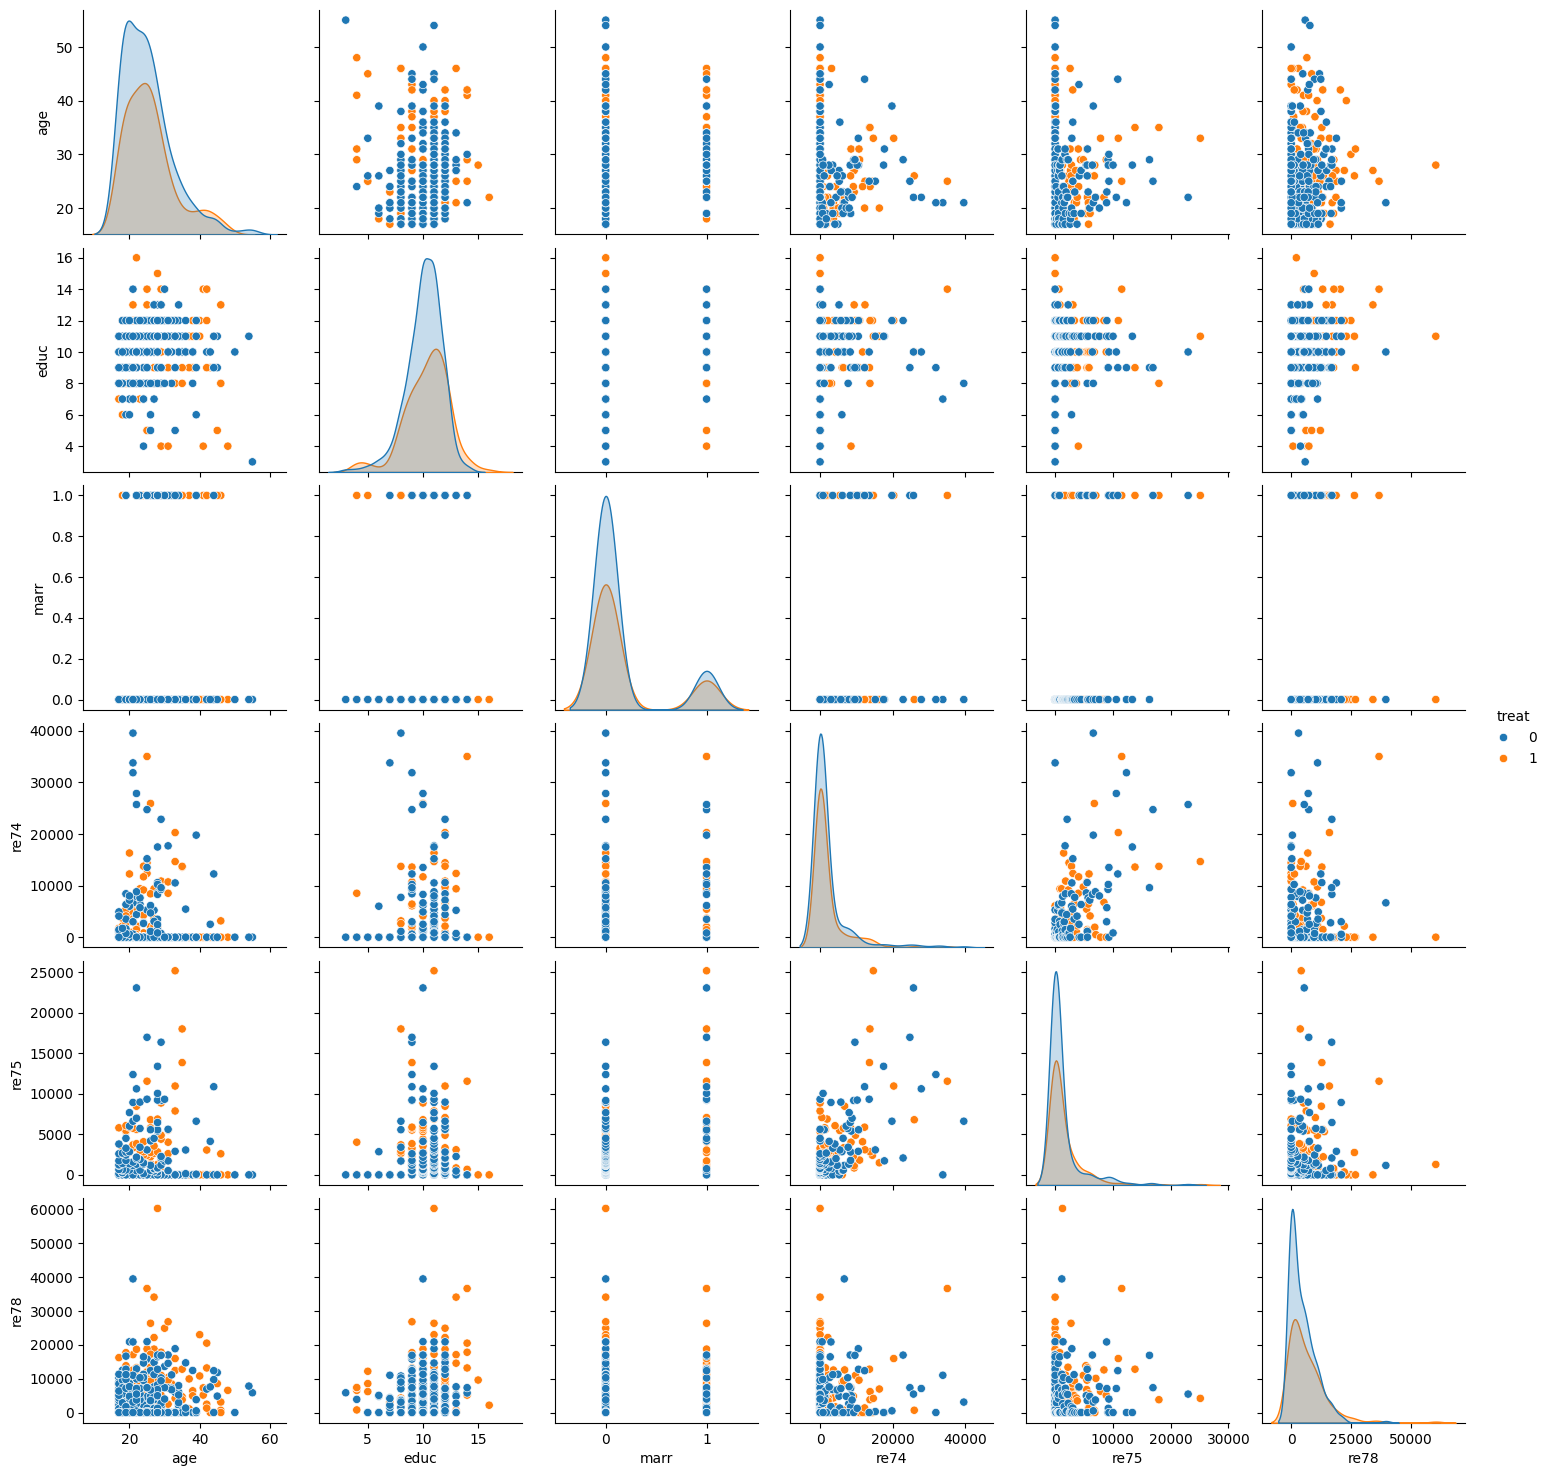

In [12]:
sns.pairplot(experiment_data, hue='treat');

> Insight: Distribusi group treatment dan group control cukup *overlap*, artinya kedua group tersebut mempunyai karakteristik yang sama.

### Estimasi efek kausal dengan menghitung Average Treatment Effect 

Untuk mengetahui dampak treatment pada data, kita bisa menghitung ATE atau nilai rata-rata efek kausal.



In [13]:
grouped_exp = experiment_data.groupby('treat')['re78'].agg(['median','mean'])

# rounding dua desimal dan menambahkan tanda dollar
grouped_exp.applymap(lambda x: f"${x:.2f}")

,median,mean
treat,,
0,$3138.80,$4554.80
1,$4232.31,$6349.14


In [14]:
# Mean Pendapatan (treated) − Mean Pendapatan (control)
ATE = grouped_exp.loc[1,'mean'] - grouped_exp.loc[0,'mean']

# (ATE/Mean pendapatan control grup) * 100 
ATE_percentage = (ATE/grouped_exp.loc[0,'mean'])* 100
print('ATE: $'+ str(round(ATE,2)))
print('ATE in percentage:' + str(round(ATE_percentage,2)) + "%")

ATE: $1794.34
ATE in percentage:39.39%


> *Interpretasi*: rata-rata, peserta program pelatihan memiliki pendapatan $1794.34 lebih tinggi pada tahun 1978 dibandingkan dengan mereka yang tidak mengikuti pelatihan. 

### Cek Signifikansi Statistik

In [15]:
# Fit linear regression models
model_exp = sm.ols('re78 ~ treat', data = experiment_data)
model_exp = model_exp.fit()

# Show the summary of model
print(model_exp.summary())

                            OLS Regression Results                            
Dep. Variable:                   re78   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.039
Date:                Fri, 15 Nov 2024   Prob (F-statistic):            0.00479
Time:                        16:12:36   Log-Likelihood:                -4542.7
No. Observations:                 445   AIC:                             9089.
Df Residuals:                     443   BIC:                             9098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4554.8011    408.046     11.162      0.0

In [16]:
model_exp.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4554.8011,408.046,11.162,0.000,3752.855,5356.747
treat[T.1],1794.3424,632.853,2.835,0.005,550.574,3038.110


In [17]:
p_value = float(model_exp.summary().tables[1].data[2][4])
print('p_value:', p_value)

p_value: 0.005


Interpretasi:
    
* $\alpha$:
  + tingkat signifikansi / tingkat error
  + umumnya 0.05
* $1-\alpha$: tingkat kepercayaan (misal alpha 0.05, maka kita akan percaya terhadap hasil analisis sebesar 95%)
* $p-value$:
  + akan dibandingkan dengan alpha untuk untuk mengambil keputusan
  + peluang data sampel berada pada bagian sangat ekstrim/berbeda signifikan dengan keadaan normal.
  
$H_0$: koefisien = 0, variabel tidak berpengaruh terhadap outcome/target

$H_1$: koefisien != 0, variabel berpengaruh terhadap outcome/target

Pengambilan keputusan:

* Jika $p-value$ < $\alpha$, maka tolak $H_0$ / terima $H_1$
* Jika $p-value$ > $\alpha$, maka gagal tolak / terima $H_0$

In [18]:
alpha = 0.05        

if p_value < alpha:
    print("Tolak H0, artinya, variabel berpengaruh terhadap outcome")
else:
    print("Gagal tolak H0,  artinya, variabel tidak berpengaruh terhadap outcome")

Tolak H0, artinya, variabel berpengaruh terhadap outcome


> **Kesimpulan**: rata-rata, peserta program pelatihan memiliki pendapatan **$1794.34** lebih tinggi pada tahun 1978 dibandingkan dengan mereka yang tidak mengikuti pelatihan. Hasil uji t menunjukkan bahwa perbedaan ini signifikan secara statistik, dengan p-value sebesar **0.005**

<font color='blue'> **[✨ Quick Summary: CTR: Randomized Controlled Trial ✨]**

Digunakan untuk melihat perbedaan dari 2 kelompok, yaitu kelompok Control (yang tidak mendapat perlakuan) serta kelompok Treatment (yang mendapat perlakuan).

Steps:
1. Definisikan Tujuan dan Hipotesis Kausal
2. Identifikasi Populasi Target
3. Pilih partisipan dengan random sampling
4. Split partisipan menjadi dua kelompok, yaitu kelompok Control dan kelompok Treatment.
5. Lakukan eksperimen dengan kurun waktu yang sudah ditentukan.
6. Bandingkan statistik kelompok Treatment dengan kelompok Control.
7. Menghitung nilai rata-rata efek kausal atau Average Treatment Effect (ATE)
8. Melakukan uji signifikansi untuk mengetahui apakah Treatment berpengaruh terhadap Target. Pengambilan keputusan:
    - jika pvalue < alpha (0.05), maka tolak H0, atau variabel berpengaruh terhadap Outcome.
    - jika pvalue > alpha (0.05), maka gagal tolak H0, atau variabel tidak berpengaruh terhadap Outcome.

### When we cannot run RCTs

- Setting up the experiment is imposible
    + example: randomly assign negara x vs y, randomized subcription member berbayar, pasang nama di halte MRT, the annual delivery of Spotify Wrapped
- Expensive experimental costs
    + contoh: 
        - uji fitur safety pada mobil varian baru
        - pengaruh program kesehatan skala besar, seperti kampanye berhenti merokok ataupun program vaksinasi. Melakukan uji coba dalam skala besar memerlukan biaya yang besar karena melibatkan banyak peserta, pegawai, dan infrastruktur yang besar. [Source](https://pmc.ncbi.nlm.nih.gov/articles/PMC6235704/#:~:text=RCTs%20can%20have%20their%20drawbacks,participants%20that%20volunteer%20to%20participate)
- Experiments takes too long
    + Pengaruh Perubahan Kurikulum Pendidikan Dasar terhadap Produktivitas Tenaga Kerja di Masa Depan: Perlu menunggu hingga peserta didik yang mengikuti kurikulum baru memasuki dunia kerja dan berkontribusi pada perekonomian. [Source](https://www.researchgate.net/publication/249795306_Randomized_Experiments_in_Educational_Policy_Research_A_Critical_Examination_of_the_Reasons_the_Educational_Evaluation_Community_has_Offered_for_not_Doing_Them)

## Alternative: Observational Data

Data observasional adalah jenis data yang dikumpulkan tanpa adanya intervensi atau perlakuan yang diatur oleh peneliti. Dalam data observasional, peneliti hanya mengamati variabel yang ada dan mencatat kejadian atau fenomena yang terjadi secara alami. Biasanya data obsevasional mudah dikumpulkan dan tersedia. Namun, karena data observasional tidak ada unsur randomisasi, maka akan ada banyak faktor-faktor dari variable lain akan mempengaruhi kesimpulannya. 

### Challenge when using observational data for causal inference:

- *Confounders*
    + Adanya  variabel-variabel yang mempengaruhi treatment maupun outcome.
    + contoh kasus LaLonde:
        - treatment = job training
        - outcome = earnings
        - confounder = age, race, intrinsic motivation/grit, dll.
    + contoh industri telekomunikasi: 
        - treatment = program bonus kuota
        - outcome = retensi pelanggan / churn rate
        - confounder = lama berlangganan, jumlah penggunaan data, pendapatan, lokasi, dll

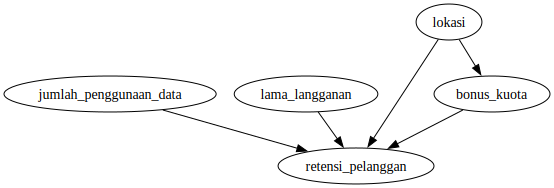

In [19]:
# Contoh DAG untuk industri telekomunikasi
telco_dag = CausalGraphicalModel(nodes = ["bonus_kuota", "retensi_pelanggan", "lama_langganan", "jumlah_penggunaan_data", "lokasi"],
                                 edges = [("bonus_kuota", "retensi_pelanggan"),
                                        ("lama_langganan", "retensi_pelanggan"),
                                        ("jumlah_penggunaan_data", "retensi_pelanggan"),
                                        ("lokasi", "bonus_kuota"),
                                        ("lokasi", "retensi_pelanggan")]
                                        )

telco_dag.draw()

- *Selection bias*
    + Selection bias terjadi ketika sampel yang digunakan dalam analisis tidak sepenuhnya representatif dari populasi target karena adanya proses seleksi yang sistematis.
    + contoh: orang yang mengikuti job training secara sukarela kemungkinan besar mempunyai perbedaan karakter/motivasi atau bisa saja mendapatkan pendapatan yang lebih rendah daripada orang yang tidak ingin mengikuti job training.
    + contoh: misal dalam aplikasi belanja masakan, orang yang klik ads akan cenderung berbelanja suatu barang. Kita tidak bisa membandingkan orang yang klik ads dengan tidak klik ads untuk mencari tau hubungan kausal klik ads dengan berbelanja. Ads biasanya personalized. Orang yang klik ads bisa saja sedari awal sudah mempunyai interest yang lebih tinggi terhadap belanja masakan, sehingga mereka akan tetap belanja dengan atau tanpa ads tersebut. 
- *Counterfactuals*
    + Counterfactual adalah skenario hipotetis yang menggambarkan hasil (outcome) yang akan terjadi jika suatu perlakuan (treatment) atau intervensi yang sebenarnya tidak terjadi di dunia nyata, sebenarnya diberikan, atau sebaliknya.
    + contoh: seorang siswa mengikuti program pelatihan intensif untuk meningkatkan skor ujian matematika. Counterfactual-nya adalah berapa skor matematika siswa tersebut jika dia tidak mengikuti program pelatihan?


Beberapa metode untuk controlling confounder dan mengatasi counterfactual pada data observasional: regresi, matching.

### Assumptions that need to be met when using observational data:

- Causal Markov Condition (Markov Assumption)

    + *A variable X is independent of every other variable (except X’s effects) conditional on all of its direct causes*
    + setelah mengontrol atau mengetahui semua penyebab langsung dari 𝑋, kita bisa mengabaikan variabel lain yang tidak memiliki pengaruh langsung terhadap X (conditional independence). 
    + menggunakan causal graph dengan DAG (Directed Acyclic Graph)

- Stable Unit Treatment Value Assumption

    + *a sample in control group doesn't affect the samples in the treatment group*
    + untuk mengatasi interaction effect
    
- Ignorability

    + *there exist no additional confounders that has an effect on the treatment and the output* 

## Regression for Controlling Confounders

**Create Causal Diagram**

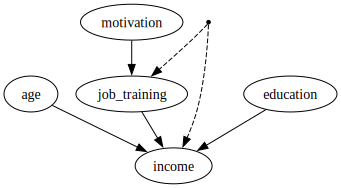

In [20]:
lalonde_obs_dag = CausalGraphicalModel(nodes = ["job_training", "income", "motivation", "age", "education"],
                                       edges = [("job_training", "income"),
                                                ("motivation", "job_training"),
                                                ("age", "income"),
                                                ("education", "income")],
                                        latent_edges=[("job_training", "income")]
                                        )

lalonde_obs_dag.draw()

**Load Data**

Kali ini, kita akan mencoba menganalisis studi yang sama, tetapi dengan data yang berbeda. Data yang akan kita gunakan adalah data observasional yang disimpan pada file `data_input/psid_all.csv`.

In [21]:
obs_data = pd.read_csv('data_input/psid_all.csv')
obs_data.head()

,treatment,age,education,black,hispanic,married,re74,re75,re78
0,1,37,11,1,0,1,0.0,0.0,9930.049805
1,1,30,12,1,0,0,0.0,0.0,24909.500000
2,1,27,11,1,0,0,0.0,0.0,7506.149902
3,1,33,8,1,0,0,0.0,0.0,289.790009
4,1,22,9,1,0,0,0.0,0.0,4056.489990


**Data Description**

- `treatment`: the treatment assignment 
    + 1=treated 
    + 0=control

- `age`: age in years.

- `education`: education in number of years of schooling.

- `black`: indicator for African-American (1=African-American, 0=not).

- `hispanic`:  an indicator for being of Hispanic origin (1=Hispanic, 0=not).

- `married`: an indicator for married (1=married, 0=not married).

- `re74`: income/real earnings in 1974, in U.S. dollars.

- `re75`: income/real earnings in 1975, in U.S. dollars.

- `re78`: income/real earnings in 1978, in U.S. dollars.


*Data source: https://justinmshea.github.io/wooldridge/reference/jtrain3.html & https://users.nber.org/~rdehejia/nswdata2.html*

**Exploratory Data Analysis**

In [22]:
obs_data.groupby('treatment').agg({'re78': 'mean'}).applymap(lambda x: f"${x:.2f}")

,re78
treatment,
0,$21553.92
1,$6349.15


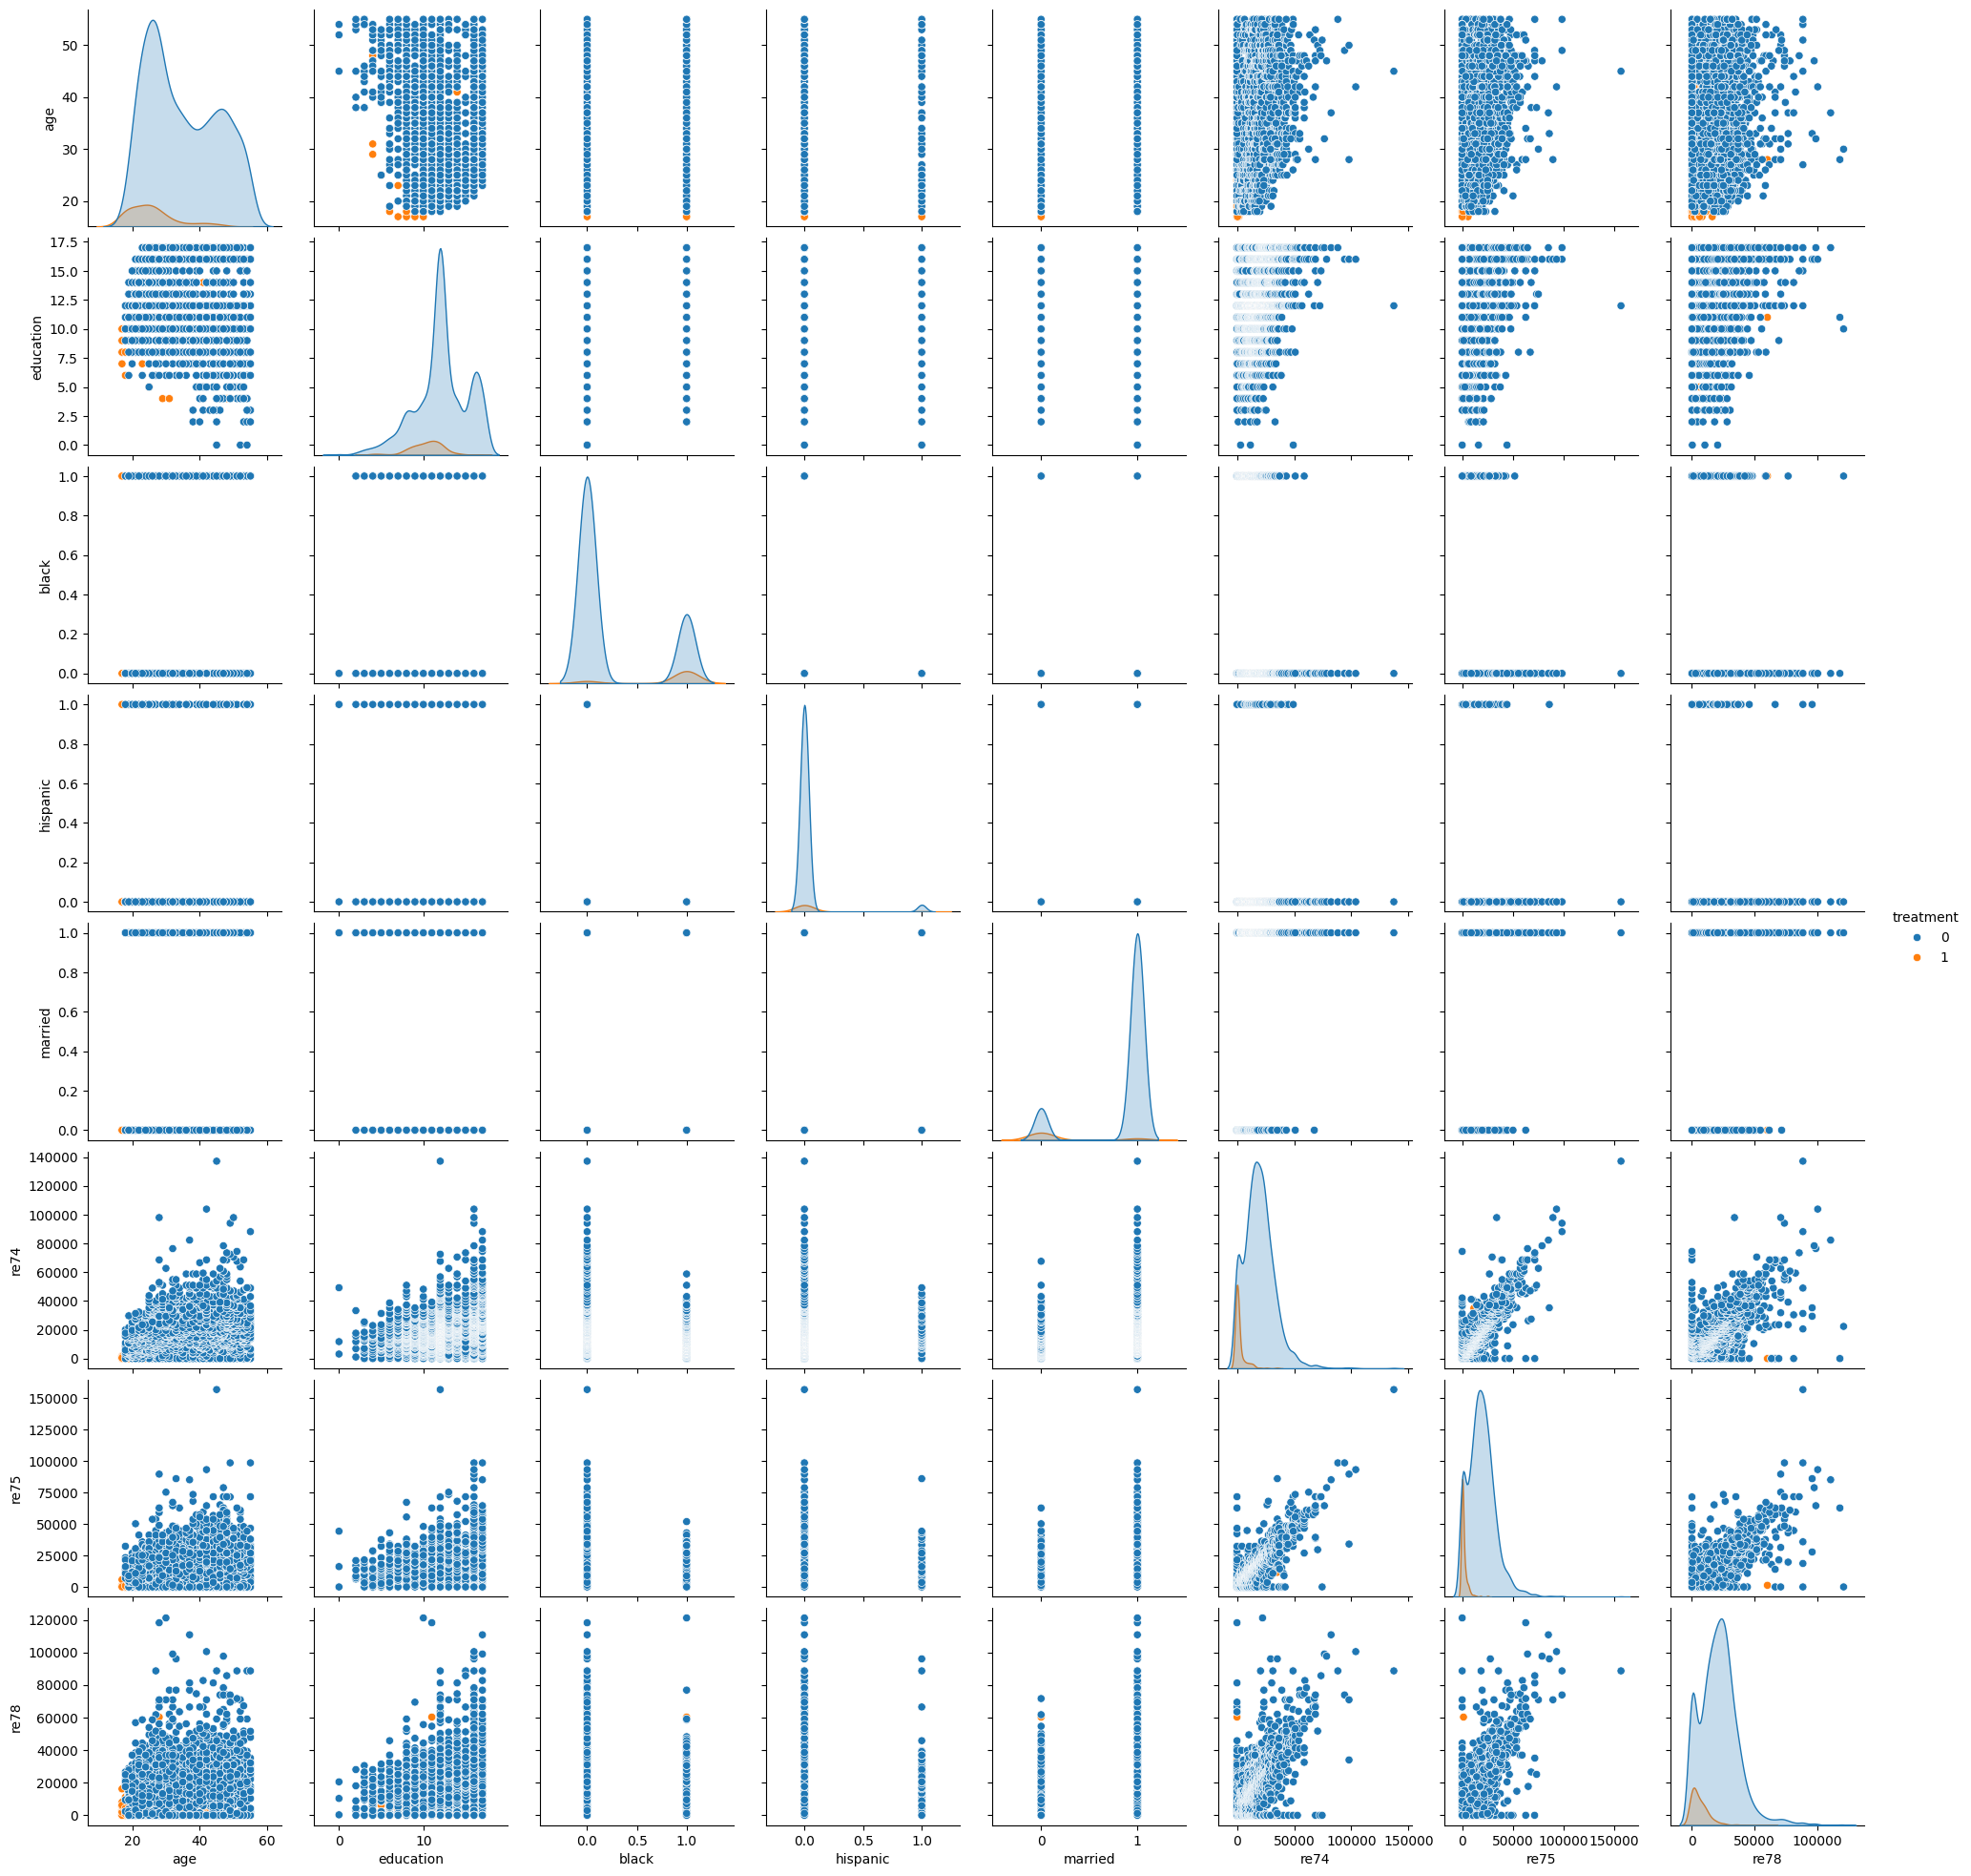

In [23]:
sns.pairplot(obs_data, hue='treatment');

- Dari table **data observasional** di atas, penghasilan rata-rata individu yang menerima `job_training` **lebih rendah** daripada mereka yang tidak menerima `job_training`.

- Hal ini berlawanan dengan kesimpulan pada **data eksperimen**, penghasilan rata-rata yang lebih tinggi berasal dari mereka yang berpartisipasi dalam `job_training`

- Jika ada perbedaan kesimpulan pada data eksperimen dengan data observasi, cek perbandingan distribusi variabel lainnya.

In [24]:
statistic_obs = obs_data.groupby('treatment').describe().loc[:,(slice(None),['mean','std'])].T

# pisah ribuan dan rounding dua angka di belakang koma
statistic_obs.applymap(lambda x: f"{x:,.2f}")

treatment               0         1
age       mean      34.85     25.82
          std       10.44      7.16
education mean      12.12     10.35
          std        3.08      2.01
black     mean       0.25      0.84
          std        0.43      0.36
hispanic  mean       0.03      0.06
          std        0.18      0.24
married   mean       0.87      0.19
          std        0.34      0.39
re74      mean  19,428.75  2,095.57
          std   13,406.88  4,886.62
re75      mean  19,063.34  1,532.06
          std   13,596.95  3,219.25
re78      mean  21,553.92  6,349.15
          std   15,555.35  7,867.40

**Regression without control variable**

In [25]:
# Fit linear regression models
model1 = sm.ols('re78 ~ treatment', data = obs_data)
model1_res = model1.fit()

# Show the summary of model
model1_res.summary2().tables[1].applymap(lambda x: f"{x:,.2f}")

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,"21,553.92",303.64,70.98,0.00,"20,958.53","22,149.32"
treatment,"-15,204.78","1,154.61",-13.17,0.00,"-17,468.80","-12,940.75"


**Regression with control variables**

In [26]:
# Fit linear regression models
model2 = sm.ols('re78 ~ treatment + re75 + age + black + education + married', data = obs_data)
model2_res = model2.fit()

# Show the summary of model
model2_res.summary2().tables[1].applymap(lambda x: f"{x:,.2f}")

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,389.68,"1,375.69",0.28,0.78,"-2,307.84","3,087.21"
treatment,630.10,922.14,0.68,0.49,"-1,178.08","2,438.29"
re75,0.79,0.02,47.26,0.00,0.75,0.82
age,-58.52,20.93,-2.80,0.01,-99.57,-17.48
black,-798.80,495.43,-1.61,0.11,"-1,770.27",172.67
education,581.18,75.75,7.67,0.00,432.65,729.72
married,"1,555.28",596.02,2.61,0.01,386.57,"2,723.98"


Bandingkan dengan data eksperimen:

In [27]:
model_exp.summary2().tables[1].applymap(lambda x: f"{x:,.2f}")

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,"4,554.80",408.05,11.16,0.00,"3,752.85","5,356.75"
treat[T.1],"1,794.34",632.85,2.84,0.00,550.57,"3,038.11"


> **Kesimpulan:** *Meskipun mengontrol variabel confounder ke dalam model regresi dapat mengurangi nilai efek treatment terhadap pendapatan, metode regresi saja masih belum cukup untuk mengestimasi efek kausal dalam data observasional ini.*

### Pitfalls when using regression

- Mengasumsikan hubungan linear: 
    + *if control variables have non linear (e.g. quadratic) influence on outcome, linear regression can't control them cleanly*
    + contoh: pengalaman kerja dengan pendapatan

- Causal structure:
    + Mediators (middle of a chain)
        - Mediator adalah variabel yang berada di antara perlakuan (X) dan hasil (Y) dalam rantai kausal. Mediator membawa efek dari perlakuan ke hasil, sehingga menengahinya.
        - contoh jalur:
            + A $\rightarrow$ **B** $\rightarrow$ Treatment 
            + E $\rightarrow$ D $\rightarrow$ **B** $\rightarrow$ C $\rightarrow$ Outcome
        - contoh: misal kita ingin mengukur efek pendidikan (X) terhadap pendapatan (Y), dengan "pengalaman kerja" sebagai mediator yang mungkin dipengaruhi oleh pendidikan dan juga mempengaruhi pendapatan. Jika kita memasukkan pengalaman kerja dalam regresi, kita hanya akan mendapatkan direct effect pendidikan terhadap pendapatan yang tidak melalui pengalaman kerja. Dengan demikian, efek total pendidikan pada pendapatan yang melewati pengalaman kerja tidak akan dihitung.
    + Colliders (common effect)
        - Regresi bisa memperkenalkan bias jika kita secara tidak sengaja mengontrol variabel yang merupakan collider (variabel yang dipengaruhi oleh kedua variabel independen dan outcome).
        - A collider is a variable on a specific path where both arrows point towards it. 
            + Treatment ← A → **B** ← C → Outcome
            + Treatment → **B** ←  Outcome
        - contoh: 

**Contoh DAG untuk mediator**

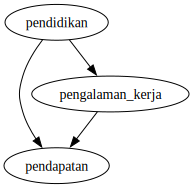

In [28]:
# Contoh DAG untuk mediator
mediator_dag = CausalGraphicalModel(nodes = ["pendidikan", "pendapatan", "pengalaman_kerja"],
                                 edges = [("pendidikan", "pendapatan"),
                                          ("pendidikan", "pengalaman_kerja"),
                                          ("pengalaman_kerja", "pendapatan")]
                                        )

mediator_dag.draw()

**Contoh DAG untuk collider**

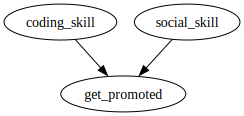

In [29]:
coll_dag = CausalGraphicalModel(nodes = ["coding_skill", "social_skill", "get_promoted"],
                                 edges = [("coding_skill", "get_promoted"),
                                          ("social_skill", "get_promoted")]
                                        )

coll_dag.draw()

+ Asumsi: 

    - coding skill dan social skill berkontribusi pada peluang get promoted
    - coding skill dan social skill tidak ada hubungannya dan tidak saling mempengaruhi
    - Jika kita mengontrol variabel get_promoted, maka *seakan-akan* ada korelasi antara social skill dengan coding skill
        +  jika seseorang dengan social skill yang rendah tetap dipromosikan, kemungkinan besar mereka memiliki coding skill yang sangat baik
        +  jika seseorang dengan coding skill rendah tetap dipromosikan, mereka mungkin memiliki social skill yang sangat baik

- *Unobserved confounders & Omitted variables bias*: 
    + Regresi tidak bisa mengontrol confounder yang tidak diketahui. Variabel-variabel ini bisa memengaruhi baik perlakuan (treatment) maupun outcome, yang menyebabkan bias dalam estimasi efek kausal.
    + contoh: unobserved ability, motivasi pribadi dll
    + metode alternatif: instrumental variables, difference-in-differences  

### <font color='red'> Note: Kapan kita bisa menggunakan regresi sebagai metode kausal?

Model regresi bisa digunakan untuk causal inference menggunakan data observasional, tetapi dengan beberapa **syarat dan asumsi**. Ketika kita menggunakan model regresi untuk mengontrol confounder seperti kasus LaLonde di atas, hal ini hanya akan berhasil jika kita telah mengidentifikasi dan memasukkan semua confounder yang relevan dan asumsi no unmeasured confounders terpenuhi.

Jika ingin mengecek apakah model regresi linier bisa digunakan untuk estimasi efek kausal, coba bandingkan koefisien di simple regression dengan koefisien di multiple regression. Jika berbeda dan terus berubah-ubah setiap ditambahkan variabel confounder lain, maka koefisien dalam regresi tersebut belum bisa mengestimasi efek kausal yang terbentuk dari variabel treatment dan variabel outcome.

*Jika regresi saja belum bisa mengestimasi efek kausal pada data, metode yang dapat kita gunakan salah satunya adalah matching.*

## Matching 

- *for estimating counterfactual, balancing covariates, and reduce selection bias*

Matching bertujuan untuk memilih observasi dalam grup kontrol yang serupa dengan observasi di grup treatment. Hal ini dilakukan agar kita membandingkan observasi yang karakteristiknya setara. Sebetulnya, ada banyak cara untuk melakukan matching, Anda dapat melihat diagram di bawah ini yang disadur dari [halaman ini](https://humboldt-wi.github.io/blog/research/applied_predictive_modeling_19/matching_methods/):

![](assets/matching.png)

Namun, pada kesempatan kali ini kita hanya akan membahas metode matching dengan dua pendekatan, mengukur jarak dan mengukur peluang:

<div align="center">
<img src="assets/Matching_Method.png" width="50%" height="50%">
</div>

- **Distance Matching**
    + Observasi dianggap serupa jika memiliki nilai yang mirip pada variabel matching.
    + Tujuan utamanya adalah meminimalkan jarak antara observasi perlakuan dan kontrol, berdasarkan seberapa dekat nilai variabel matching mereka.
    
- **Propensity Score Matching**
    + Mengukur peluang suatu observasi mendapatkan treatment atau tidak

### Distance Matching: Exact Matching

Langkah-langkah manual:

1. Drop duplicate di grup control. -> untuk mengurangi waktu untuk mencari observasi matchnya
2. merge data grup treatment dengan data grup control, mergenya berdasarkan variable yang ingin kita kontrol. left merge karena kita ingin ambil semua baris observasi di grup treatment.
3. Mencari efek kausal dengan menghitung rata-rata dari selisih variabel outcome di grup treatment dengan hasil match group control. 

Perhitungan Average Treatment Effect:

$$ATE = \frac{1}{N} \sum_{i=1}^N (Y_{i}^{T} - Y_{i}^{C})$$

[**Ilustrasi Exact Matching**](https://docs.google.com/spreadsheets/d/1jWyEDA3d0e7j5vCpGFjDLmHZ_UDrW25JvICVRHkkAY4/edit?usp=sharing)

**Pitfalls when using Exact Matching**
- Curse of dimensionality: go through matching many times
- Lack of find common support: hard to find enough matched from data

### Distance Matching: k-Neareast Neighbor Matching

Metode kNN akan mengkasifikasi data baru dengan membandingkan karakteristik data baru (data test) dengan data yang ada (data train). 

Dalam konteks proses matching, kNN digunakan untuk mencocokkan observasi-observasi yang serupa berdasarkan karakteristik tertentu (biasanya confounders) antara kelompok treatment dan kelompok kontrol. Tujuannya adalah untuk membuat kelompok yang akan dibandingkan menjadi sebanding atau serupa sehingga perbedaan outcome antara keduanya bisa lebih dipercaya sebagai akibat dari treatment, bukan dari perbedaan dalam karakteristik lainnya.

Kedekatan karakteristik tersebut diukur dengan metrik pengukuran jarak hingga didapatkan k titik data (tetangga) dengan jarak terdekat. Kelas terbanyak yang dimiliki para tetangga ini yang menjadi kelas dari data baru (majority voting).

![](assets/KNN.png)

**Langkah-langkah manual:**

1. Preprocessing data dengan melakukan standarisasi karena akan menghitung jarak 
2. Buat dua model kNN dengan X adalah variabel yang ingin dikontrol dan Y adalah variabel outcomenya
    - model pertama untuk mencari jarak pada data di grup control
    - model kedua untuk mencari jarak pada data di grup treatment 
3. Prediksi match tiap observasi di grup treatment dengan model pertama
4. Prediksi match tiap observasi di grup control dengan model kedua
6. Calculate the average treatment effect

$$\hat{ATE} = \frac{1}{N} \sum^N_{i=1} (2T_i - 1)\big(Y_i - Y_{jm}(i)\big)$$

dengan $Y_{jm}(i)$ : the sample from the other treatment group which is most similar to $Y_i$

misal:

- perhitungan_1: observasi yang mendapatkan treatment dan tidak dapat treatment dikasih bobot yang berbeda. Ketika T = 0 maka hasilnya 1. Keitka T= 1, maka hasilnya adalah -1. 
- perhitungan_2: nilai outcome dikurang nilai matching hasil prediksi 
- perhitungan_3: kalikan perhitungan_1 dengan perhitungan_2
- perhitungan_4: cari rata-rata dari perhitungan_3

*Note: secara umum, matching yang dicari ada pada kedua group (treatment dan control group). Namun, ada juga yang mencari match pada data di group treatment saja.*

**Menggunakan library `CausalModel`**

`CausalModel()` parameter:
- `Y`: variabel outcome. Variabel yang ingin diestimasi efek perlakuannya.
- `D`: variabel treatment. Variabel yang menunjukkan apakah suatu observasi menerima perlakuan atau tidak.
- `X`: variabel confounders. Variabel-variabel yang diharapkan mempengaruhi baik outcome maupun treatment.

[Library documentation](https://causalinferenceinpython.org/causalinference.html)

In [30]:
from causalinference import CausalModel
model_distance_knn = CausalModel(Y=obs_data.re78.values, 
                 D=obs_data.treatment.values, 
                 X=obs_data[["age", "education", "black", "hispanic", "married", "re75"]].values
)

EDA: membandingkan perbedaan kelompok treatment dengan kelompok control

In [31]:
print(model_distance_knn.summary_stats)


Summary Statistics

                      Controls (N_c=2490)         Treated (N_t=185)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y    21553.921    15555.346     6349.145     7867.405   -15204.776

                      Controls (N_c=2490)         Treated (N_t=185)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0       34.851       10.441       25.816        7.155       -1.009
             X1       12.117        3.082       10.346        2.011       -0.681
             X2        0.251        0.433        0.843        0.365        1.480
             X3        0.033        0.177        0.059        0.237        0.129
             X4        0.866        0.340        0.189        0.393       -1.842
      

**Interpretasi**

- *Raw-diff is the raw difference between the means of the control and treatment groups.*
    + Interpretasi: group control (yang tidak mendapatkan training) memiliki pendapatan $15204.78 lebih rendah dibanding group treatment
- *Nor-diff in this package is Imbens and Rubin's normalized differences (2015) in average covariates*
    + lebih dari 0.25 dapat dianggap ada perbedaan yang besar
    + Interpretasi: variable X0, X2, X4, dan X5 (age, black, married, dan re75) mempunyai perbedaan yang cukup besar.
        - *more younger people, black people, less married people and lower income in 1974 in the treatment group than in the control group.*

Beberapa parameter pada method [`est_via_matching()`](https://causalinferenceinpython.org/causalinference.html#causalinference.causal.CausalModel.est_via_matching):

- `weights`: metrik pengukuran jarak. Default input berupa `inv` untuk *inverse variance weighting* dan `maha` untuk Mahalonobis distance.
- `matches`: jumlah tetangga (k) yang digunakan untuk proses matching

In [32]:
model_distance_knn.est_via_matching(matches=10)
print(model_distance_knn.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE -11858.162   1548.130     -7.660      0.000 -14892.498  -8823.827
           ATC -12583.797   1635.554     -7.694      0.000 -15789.483  -9378.110
           ATT  -2091.515   1721.018     -1.215      0.224  -5464.711   1281.680



**Kesimpulan:** rata-rata, peserta program pelatihan memiliki pendapatan **$11858.162** lebih rendah pada tahun 1978 dibandingkan dengan mereka yang tidak mengikuti pelatihan. Hasil uji t menunjukkan bahwa perbedaan ini signifikan secara statistik, dengan p-value sebesar **0.005**

Note: jumlah observasi akhir pada via_matching() umumnya sebanding dengan ukuran treatment group dan parameter matching yang dipilih, terutama k dan apakah replacement diizinkan atau tidak.

[Further study]: *[LaLonde (1986) after Nearly Four Decades: Lessons Learned](https://yiqingxu.org/tutorials/lalonde/)*

*Caveat: matching menggunakan kNN dengan jarak Euclidean membutuhkan nilai bertipe numerik. Jika variabel confounder banyak bertipe kategorik, maka bisa menggunakan metrik distance lain (gower distance) atau propensity score matching.*

### Propensity Score Matching

- dikatakan match jika peluang untuk mendapatkan treatment yang mirip

- Propensity scores biasanya diestimasi dengan menggunakan model logistic regression. Jika Anda ingin mengstimasi menggunakan model yang lebih robust, Anda dapat menggunakan model-model keluarga tree (ex: random forest, XGBoost, dll). 

Recall Logistic Regression model:

*Logistic Regression merupakan salah satu metode klasifikasi yang konsepnya hampir mirip dengan regresi linear. Hanya saja, dalam logistic regression tidak menghitung secara spesifik nilai prediksi target variable, namun menghitung **kemungkinan/peluang** pada masing-masing kelas target.*

$$
y =  p(x) = Sigmoid(\beta_0 + \beta_1 \cdot x_1 + ... + \beta_n \cdot x_n)
$$

dengan $y$ adalah nilai propensity atau peluang seseorang mendapatkan treatment atau tidak dan $x$ adalah variabel-variabel confounders yang diperhitungkan.

Langkah-langkah:

1. Estimasi propensity score menggunakan model logistic regression
2. Matching data di group treatment dengan group control menggunakan propensity score
    + Nearest Neighbor
        - Mahalonobis distance
3. Matching Quality Evaluation
    + compare means (t-test, Nor-diff)
    + visual comparison (histogram, boxplot)

### Example Case: [Relationships Among Minimum Requirements, Facebook Likes, and Groupon Deal Outcomes (2015)](https://dl.acm.org/doi/10.1145/2764919)

<div align="center">
<img src="assets/groupon_requirement.png" width="50%" height="50%">
</div>

<p style="text-align:center;"><a href="https://user-images.githubusercontent.com/595772/170339482-d70ef9ca-a9c1-4707-b41e-8b987f99deee.png">Sumber Gambar: Harry Wang</a></p>

Beberapa penawaran Groupon memiliki persyaratan minimal (minimum_requirements), misalnya seperti yang terlihat pada gambar, penawaran hanya berlaku jika terdapat setidaknya 100 pembeli yang berkomitmen.

**Does having the minimal requirement affect the deal outcomes, such as revenue, quantity sold, and Facebook likes received?**

In [33]:
groupon_df = pd.read_csv('data_input/groupon.csv')
groupon_df.head()

,deal_id,start_date,min_req,treatment,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue
0,heli-flights,9/23/2011,10,1,4,99,51,185,1,1,290,540,53460
1,gl-champion-series-tennis-electric-factory,9/23/2011,20,1,2,95,41,9,0,1,43,190,18050
2,realm-of-terror-horror-experience,9/23/2011,50,1,3,25,50,38,0,1,208,380,9500
3,newport-gourmet,9/23/2011,15,1,3,50,50,369,0,1,16,90,4500
4,the-clayroom,9/23/2011,20,1,4,25,52,185,0,1,85,580,14500


- Treatment Variable:
    + Treatment Group:
    + Control Group:
- Outcome Variable:
- Variable for matching:

In [34]:
groupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   deal_id          710 non-null    object
 1   start_date       710 non-null    object
 2   min_req          710 non-null    int64 
 3   treatment        710 non-null    int64 
 4   prom_length      710 non-null    int64 
 5   price            710 non-null    int64 
 6   discount_pct     710 non-null    int64 
 7   coupon_duration  710 non-null    int64 
 8   featured         710 non-null    int64 
 9   limited_supply   710 non-null    int64 
 10  fb_likes         710 non-null    int64 
 11  quantity_sold    710 non-null    int64 
 12  revenue          710 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 72.2+ KB


In [35]:
groupon_df.describe()

,min_req,treatment,prom_length,price,discount_pct,coupon_duration,featured,limited_supply,fb_likes,quantity_sold,revenue
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.00000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,8.759155,0.304225,3.678873,35.300000,53.061972,106.86338,0.116901,0.829577,88.669014,386.652113,10642.701408
std,27.880963,0.460403,1.323959,36.356624,8.190716,128.15513,0.321529,0.376269,150.282551,663.358446,18131.366995
min,1.000000,0.000000,2.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,15.000000,50.000000,11.00000,0.000000,1.000000,17.000000,70.000000,1565.000000
50%,1.000000,0.000000,3.000000,24.000000,51.000000,75.00000,0.000000,1.000000,40.500000,190.000000,5000.000000
75%,5.000000,1.000000,4.000000,39.000000,56.000000,185.00000,0.000000,1.000000,99.000000,480.000000,12450.000000
max,300.000000,1.000000,9.000000,299.000000,85.000000,1812.00000,1.000000,1.000000,1596.000000,5000.000000,210000.000000


In [36]:
# set variable
X = groupon_df[['prom_length', 'price', 'discount_pct', 'coupon_duration', 'featured', 'limited_supply']].values
Y = groupon_df['fb_likes'].values
D = groupon_df['treatment'].values

Function: `CausalModel().est_propensity()`

`CausalModel()` parameter:
- `Y`: variabel outcome. Variabel yang ingin diestimasi efek perlakuannya.
- `D`: variabel treatment. Variabel yang menunjukkan apakah suatu observasi menerima perlakuan atau tidak.
- `X`: variabel confounders. Variabel-variabel yang diharapkan mempengaruhi baik outcome maupun treatment.

[Library documentation](https://causalinferenceinpython.org/causalinference.html)

In [37]:
# modelling
model_propensity = CausalModel(Y, D, X)

In [38]:
print(model_propensity.summary_stats)


Summary Statistics

                       Controls (N_c=494)         Treated (N_t=216)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       77.941      135.725      113.204      177.110       35.262

                       Controls (N_c=494)         Treated (N_t=216)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        3.810        1.310        3.380        1.310       -0.328
             X1       37.870       37.760       29.421       32.242       -0.241
             X2       52.974        8.711       53.264        6.870        0.037
             X3       95.941      127.455      131.843      126.528        0.283
             X4        0.105        0.307        0.144        0.351        0.116
      

**Interpretasi**

- *Raw-diff is the raw difference between the means of the control and treatment groups.*
    + Interpretasi: secara rata-rata, kupon-kupon yang mempunyai minimum_requirement mendapatkan facebook likes lebih banyak 35 likes dibanding kupon-kupon yang tidak mempunyai minimum_requirement (group control)
- *Nor-diff in this package is Imbens and Rubin's normalized differences (2015) in average covariates*
    + lebih dari 0.25 dapat dianggap ada perbedaan yang besar
    + Interpretasi: karakteristik variabel confounder antar group treatment dan group control tidak berbeda jauh.

**Prediksi propensity score**

In [39]:
# # Estimate the propensity score using logit
model_propensity.est_propensity()

Summary dari hasil model logistic regression untuk memprediksi propensity score:

In [40]:
print(model_propensity.propensity)


Estimated Parameters of Propensity Score

                    Coef.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
     Intercept      0.952      0.679      1.401      0.161     -0.380      2.283
            X0     -0.331      0.076     -4.373      0.000     -0.479     -0.182
            X1     -0.009      0.003     -2.844      0.004     -0.014     -0.003
            X2     -0.008      0.011     -0.757      0.449     -0.029      0.013
            X3      0.004      0.001      4.191      0.000      0.002      0.005
            X4      0.326      0.252      1.292      0.196     -0.169      0.820
            X5     -0.385      0.229     -1.686      0.092     -0.833      0.063



Interpretasi:

- Sama seperti membaca summary model logistic regression. 
- Coef. dalam bentuk log of odds.
- Tanda positif (+) menunjukan peningkatan nilai variabel ini meningkatkan peluang menerima treatment.
- variabel yang signifikan mempengaruhi propensity score mempunyai p-value di bawah 0.05

[Opsional]: kita dapat melakukan trimming beberapa observasi yang mempunyai propensity score terlalu tinggi dan terlalu rendah. Hal ini dapat meningkatkan keseimbangan (balance) antara grup kontrol dan grup treatment. Dengan menghilangkan observasi yang memiliki propensity score yang terlalu ekstrem (baik terlalu rendah maupun terlalu tinggi), model lebih mudah untuk mencari pasangan yang cocok antara group treatment dan group control.

In [41]:
# trimming
model_propensity.trim_s()

In [42]:
print(model_propensity.summary_stats)


Summary Statistics

                       Controls (N_c=469)         Treated (N_t=210)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       75.322      126.277      108.810      166.193       33.488

                       Controls (N_c=469)         Treated (N_t=210)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        3.697        1.203        3.305        1.238       -0.322
             X1       33.612       30.228       27.376       29.688       -0.208
             X2       52.930        8.726       53.138        6.706        0.027
             X3       93.403      102.942      133.586      127.428        0.347
             X4        0.109        0.312        0.143        0.351        0.103
      

Setelah Anda mendapatkan propensity score, sebetulnya ada banyak metode yang dapat digunakan untuk mengolah propensity score ini, yaitu *matching, weighting, dan stratification*.

Namun, untuk kesempatan kali ini, kita akan menggunakan propensity score untuk metode matching, sesuai dengan topik yang sedang dibahas.

**Matching dengan propensity score**

In [43]:
model_propensity.est_via_matching()

print(model_propensity.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     45.521     22.707      2.005      0.045      1.015     90.027
           ATC     45.027     25.564      1.761      0.078     -5.079     95.132
           ATT     46.624     26.673      1.748      0.080     -5.655     98.903



<details>
  <summary>Click to expand: Information from `model.estimate causalinference` library:</summary>

  | Variable | Description | 
| :--- | :--- | 
| **ATE (Average Treatment Effect)**  | ATE mengukur efek rata-rata dari treatment pada seluruh populasi, baik mereka yang menerima treatment maupun yang tidak. | 
| **ATC (Average Treatment Effect on the Control)** | Mengukur efek rata-rata dari treatment hanya pada group control. Digunakan ketika ingin memperkirakan bagaimana outcome akan berubah jika group control (non-treatment) menerima treatment| 
| **ATT (Average Treatment Effect on the Treated)** |  Mengukur efek rata-rata dari treatment hanya pada grup yang menerima treatment. Digunakan ketika ingin mengevaluasi efek treatment pada kelompok yang benar-benar menerima treatment. | 
|**Est. (Estimasi)**  | Besarnya pengaruh perlakuan. Jika Est. positif, artinya perlakuan cenderung meningkatkan nilai variabel outcome, dan sebaliknya. | 
| **S.e. (Standard error)** | Tingkat kepercayaan terhadap angka Est. Semakin kecil, semakin sampel mewakili populasi.|
| **z dan P >\|z\|** | uji z untuk menentukan apakah pengaruh suatu perlakuan signifikan secara statistik.|
| **[95% Conf. int.]** | Confidence Interval (CI) 95%. Rentang nilai-yang-mungkin untuk pengaruh perlakuan yang sebenarnya.|

</details>


> **Kesimpulan**: secara rata-rata, adanya minimum requirement di suatu deals/kupon memberikan peningkatan facebook likes sekitar +-46 likes yang statistically significant.

### Balance Checking: How do we know how well matching works?

- Perbedaan dalam distribusi covariates/variabel X (sebelum dan sesudah matching)
- Propensity scores (sebelum dan sesudah matching)
- Normalized differences (Nor-diff) antara kelompok kontrol dan treated
- Visualisasi distribusi propensity scores Jika distribusi covariates dan propensity scores lebih mirip antara kedua kelompok setelah matching, maka kualitas matching dapat dianggap baik.

In [44]:
# example
print(model_propensity.summary_stats)


Summary Statistics

                       Controls (N_c=469)         Treated (N_t=210)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y       75.322      126.277      108.810      166.193       33.488

                       Controls (N_c=469)         Treated (N_t=210)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        3.697        1.203        3.305        1.238       -0.322
             X1       33.612       30.228       27.376       29.688       -0.208
             X2       52.930        8.726       53.138        6.706        0.027
             X3       93.403      102.942      133.586      127.428        0.347
             X4        0.109        0.312        0.143        0.351        0.103
      

### Assumptions in Matching

- Conditional Independence Assumption (Ignorability)
    + Setelah melakukan matching pada variabel-variabel pengganggu (confounders), treatment dan outcome harus bebas dari pengaruh variabel yang tidak diobservasi. Perbedaan dalam outcome antara kelompok treatment dan kontrol seharusnya hanya disebabkan oleh treatment, bukan oleh faktor lain yang tidak diukur.
- Common Support
    + setiap unit dalam populasi harus memiliki probabilitas positif untuk berada di kedua kelompok (treatment dan kontrol). Dengan kata lain, semua unit memiliki pasangan yang dapat diobservasi di kedua kelompok untuk melakukan perbandingan.
- SUTVA (Stable Unit Treatment Value Assumption)
    + hasil (outcome) untuk setiap unit hanya dipengaruhi oleh treatment yang diterimanya, bukan oleh treatment yang diterima oleh unit lain. Ini berarti tidak ada efek spillover antar unit, dan setiap unit adalah independen satu sama lain.

### What if you want to do causal inference with just a few treated units?

- Examples: policy changes, elections, pandemic
    + Rare: happen infrequently
    + large unit: impact entire city, country, etc



## Difference in Difference (DiD)

Metode Difference in Difference (DiD) adalah metode yang bisa digunakan pada data observasional ketika ingin menghitung perbedaan/perubahan suatu output dari waktu ke waktu antara group treatment dengan group control.

<div align="center">
<img src="assets/did.png" width="50%" height="50%">
</div>

### Example Case: [Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania (1994)](https://davidcard.berkeley.edu/papers/njmin-aer.pdf)

- Pada November 1992, New Jersey menaikan upah minimumnya dari $4.2 ke $5.05
- Card and Krueger (1994) ingin mencari tahu apakah ada efek dari kenaikan minimum wage (UMR) terhadap penyerapan tenaga kerja (employment) di New Jersey.
- Untuk membandingkan dengan state yang karakternya mirip, mereka memilih Pennsylvania sebagai grup kontrol. Pensylvania merupakan state yang upah minimumnya tetap sama, yaitu $4.25

**Apakah ada efek kausal dari kenaikan upah minimum terhadap penyerapan tenaga kerja?**


In [45]:
employment = pd.read_csv("data_input/employment.csv")
employment

,state,total_emp_feb,total_emp_nov
0,0,40.50,24.00
1,0,13.75,11.50
2,0,8.50,10.50
3,0,34.00,20.00
4,0,24.00,35.50
...,...,...,...
379,1,9.00,23.75
380,1,9.75,17.50
381,1,24.50,20.50
382,1,14.00,20.50


**Data Description:**

- `state`: 
    + 1 = New Jersey (NJ) 
    + 0 = Pennsylvania (PA)
- `total_emp_feb`: total employment in February (before)
- `total_emp_nov`: total employment in November (after)

### Using Simple Mean Calculation

Hitung rata-rata penyerapan tenaga kerja (employment) sebelum dan sesudah di New Jersey dan Pennsylvania:

In [46]:
employment_per_state = employment.groupby('state').mean()
employment_per_state

,total_emp_feb,total_emp_nov
state,,
0,23.380000,21.096667
1,20.430583,20.897249


In [47]:
mean_emp_pa_before = employment_per_state.iloc[0, 0]
mean_emp_pa_after = employment_per_state.iloc[0, 1]
mean_emp_nj_before = employment_per_state.iloc[1, 0]
mean_emp_nj_after = employment_per_state.iloc[1, 1]

print(f'mean PA employment before: {mean_emp_pa_before:.2f}')
print(f'mean PA employment after: {mean_emp_pa_after:.2f}')
print(f'mean NJ employment before: {mean_emp_nj_before:.2f}')
print(f'mean NJ employment after: {mean_emp_nj_after:.2f}')

mean PA employment before: 23.38
mean PA employment after: 21.10
mean NJ employment before: 20.43
mean NJ employment after: 20.90


**Control Group**: Hitung perbedaan `employment` di Pennsylvania setelah dan sebelum peraturan kenaikan upah minimum

In [48]:
pa_diff = mean_emp_pa_after - mean_emp_pa_before
print(f'difference of mean PA employment: {pa_diff:.2f}')

difference of mean PA employment: -2.28


**Treatment Group:** Hitung perbedaan `employment` di New Jersey setelah dan sebelum peraturan kenaikan upah minimum

In [49]:
nj_diff = mean_emp_nj_after - mean_emp_nj_before
print(f'difference of mean NJ employment: {nj_diff:.2f}')

difference of mean NJ employment: 0.47


**DiD**: Hitung DiD -> perbedaan antara group treatment dan group control, yaitu

  *(perbedaan setelah dan sebelum di New Jersey) - (perbedaan setelah dan sebelum di Pennsylvania)* 

In [50]:
DiD = nj_diff - pa_diff
print(round(DiD, 2))

2.75


> **Kesimpulan**: Estimasi dampak dari kenaikan upah minimum di New Jersey terhadap penyerapan tenaga kerja adalah sebesar 2.75



### Using Regression

DiD di atas juga bisa diestimasi dengan model regresi:

$$Y = \beta_0 + \beta_1 Time + \beta_2 Experimental + \beta_3 (After \times Experimental) + \varepsilon$$

dengan 

- $Y$ = employment
- $Time$ = bernilai 0 jika sebelum policy diterapkan, bernilai 1 jika setelah policy diterapkan
- $Experimental$ = bernilai 0 jika dari Pennsylvania (*control group*), bernilai 1 jika dari New Jersey (*treatment group*)
- $\beta_3$ = estimasi efek kausal dari perubahan upah minimum

In [51]:
# data sebelum treatment
df_before = employment[['total_emp_feb', 'state']]

# Time = 0. Sebelum policy kenaikan upah minimum
df_before['Time'] = 0
df_before.columns = ['Total_Employment', 'Experimental_Group', 'Time']
df_before.head()


,Total_Employment,Experimental_Group,Time
0,40.50,0,0
1,13.75,0,0
2,8.50,0,0
3,34.00,0,0
4,24.00,0,0


In [52]:
# data setelah treatment
df_after = employment[['total_emp_nov', 'state']]

# Time = 0. Setelah policy kenaikan upah minimum
df_after['Time'] = 1
df_after.columns = ['Total_Employment', 'Experimental_Group', 'Time']
df_after.head()

,Total_Employment,Experimental_Group,Time
0,24.0,0,1
1,11.5,0,1
2,10.5,0,1
3,20.0,0,1
4,35.5,0,1


In [53]:
# concat data untuk model regresi
df_regresi = pd.concat([df_before, df_after])

# buat interaksi antara group dengan time
df_regresi['After_Experimental'] = df_regresi['Experimental_Group'] * df_regresi['Time']
df_regresi

,Total_Employment,Experimental_Group,Time,After_Experimental
0,40.50,0,0,0
1,13.75,0,0,0
2,8.50,0,0,0
3,34.00,0,0,0
4,24.00,0,0,0
...,...,...,...,...
379,23.75,1,1,1
380,17.50,1,1,1
381,20.50,1,1,1
382,20.50,1,1,1


In [54]:
# model regresi
model = sm.ols('Total_Employment ~ Experimental_Group + Time + After_Experimental', 
               data = df_regresi)

# Fit the model
results = model.fit()

# Print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Total_Employment   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.947
Date:                Fri, 15 Nov 2024   Prob (F-statistic):              0.121
Time:                        16:12:54   Log-Likelihood:                -2817.6
No. Observations:                 768   AIC:                             5643.
Df Residuals:                     764   BIC:                             5662.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.3800      1

In [55]:
# koefisien regresi
results.params

Intercept             23.380000
Experimental_Group    -2.949417
Time                  -2.283333
After_Experimental     2.750000
dtype: float64

> **Kesimpulan:** dengan menggunakan metode DiD, estimasi dampak dari kenaikan upah minimum di New Jersey terhadap penyerapan tenaga kerja adalah sebesar 2.75.

### Challenge when using DiD for causal inference:

Estimasi Difference-in-Differences (DID) dilakukan menggunakan data deret waktu, yang mana pengamatan tidak bersifat independen dan cenderung saling berkorelasi (autocorrelation). Korelasi ini menyebabkan penyimpangan dalam perhitungan standar error jika dihitung dengan cara biasa, yang dapat menghasilkan pengujian signifikansi yang kurang akurat dan keputusan yang tidak tepat.

Further Reference: [Spotify Engineering: How to Accurately Test Significance with Difference in Difference Models](https://engineering.atspotify.com/2023/09/how-to-accurately-test-significance-with-difference-in-difference-models/)

## Instrumental Variable

Instrumental variabel adalah suatu metode causal inference ketika kita ingin mencari suatu kondisi di mana kita dapat meniru *randomized experiment* dalam memilih observasi yang mendapatkan suatu perlakuan.

- Langkah-langkah: 
  - Gunakan instrumen untuk menjelaskan treatment.
  - Hilangkan bagian treatment yang tidak dijelaskan oleh instrumen.
  - Gunakan instrumen untuk menjelaskan outcome.
  - Hilangkan bagian outcome yang tidak dijelaskan oleh instrumen.

- Model yang digunakan: Two Stage Least Square
  + Regresi stage pertama: Regresikan variabel treatment ($X$) terhadap Z dan variabel confounder lainnya. Dari regresi ini, kita akan mendapatkan hasil prediksi variabel treatment ($\hat{X}$)
  $$    X = \gamma_0 + \gamma_1Z+ \gamma_2W+ \nu$$
  + Regresi stage kedua: regresikan variabel outcome $Y$ terhadap ($\hat{X}$) hasil dari regresi pertama.
  $$Y = \beta_0 + \beta_1\hat{X} + \beta_2W+ \varepsilon$$


Spotify Case:

Ingin mengukur impact dari suatu fitur kolaborasi baru yang harus direlease ke seluruh user. Adanya unsur kolaborasi pada fitur tersebut membuat pembentukan group control menjadi tidak mungkin. Salah satu metode yang bisa digunakan adalah dengan release fitur ke seluruh user, tetapi membuat unsur *random encouragement* untuk tiap user memakai fitur baru tersebut. Contohnya, pada group treatment, ada iklan di homepage untuk menggunakan fitur tersebut. Di group control, tidak ada iklan.

Causal Diagram yang terbentuk:

<div align="center">
<img src="assets/iv_spotify_dag.png" width="50%" height="50%">
</div>

<p style="text-align:center;"><a href="https://engineering.atspotify.com/2023/08/encouragement-designs-and-instrumental-variables-for-a-b-testing/">Sumber Gambar: Spotify Engineering</a></p>

dengan $Z$ adalah instrumental variabel, $D$ adalah apakah user menggunakan fitur baru, dan $Y$ adalah impact fitur tersebut. Pada confounder, garis putus-putus menunjukkan hubungan yang mungkin tidak teramati.

### Example Case: [Social Networks and the Decision to Insure](https://www.aeaweb.org/articles?id=10.1257/app.20130442)

Jing Cai, Alain De Janvry, dan Elisabeth Sadoulet ingin menganalisis bagaimana petani di rural China mengambil keputusan untuk membeli asuransi dan apakah proses pengambilan keputusan ini dipengaruhi oleh informasi yang disebarkan melalui jejaring sosial.

**Menganalisis apakah kemungkinan petani untuk membeli asuransi dipengaruhi oleh keputusan terkait asuransi yang dibuat oleh teman-teman mereka yang berpartisipasi dalam sesi putaran pertama?**

<div align="center">
<img src="assets/iv_social_insure.png" width="50%" height="50%">
</div>

**Load Data**

In [56]:
social_insure = causaldata.social_insure.load_pandas().data
social_insure.head()

,address,village,takeup_survey,age,agpop,ricearea_2010,disaster_prob,male,default,intensive,risk_averse,literacy,pre_takeup_rate
0,beilian2,beilian,0,62.0,2.0,10.0,30.0,1.0,1,0,0.0,0.0,0.071429
1,beilian2,beilian,1,63.0,5.0,15.0,100.0,1.0,1,0,0.0,1.0,0.071429
2,beilian2,beilian,1,44.0,3.0,7.5,20.0,1.0,1,1,0.0,1.0,0.071429
3,beilian2,beilian,1,76.0,6.0,NaN,50.0,1.0,1,1,0.6,1.0,0.071429
4,beilian2,beilian,0,52.0,6.0,11.0,0.0,1.0,1,1,0.2,1.0,0.071429


In [57]:
print(causaldata.social_insure.NOTE)
print("-------")
print(causaldata.social_insure.DESCRLONG)
print("-------")
print(causaldata.social_insure.SOURCE)

::
    Number of observations - 1410
    Number of variables - 13
    Variables name definitions::
            address - Natural village
            village - Administrative village
            takeup_survey - Whether farmer ended up purchasing insurance. (1 = yes)
            age - Household Characteristics - Age
            agpop - Household Characteristics - Household Size
            ricearea_2010 - Area of Rice Production
            disaster_prob - Perceived Probability of Disasters Next Year
            male - Household Caracteristics: Gender of Household Head (1 = male)
            default - "Default option" in experimental format assigned to. (1 = default is to buy, 0 = default is to not buy)
            intensive - Whether or not was assigned to "intensive" experimental session (1 = yes)
            risk_averse - Risk aversion measurement
            literacy - 1 = literate, 0 = illiterate
            pre_takeup_rate - Takeup rate prior to experiment

-------
The social_insur

In [58]:
social_insure.describe()

,takeup_survey,age,agpop,ricearea_2010,disaster_prob,male,default,intensive,risk_averse,literacy,pre_takeup_rate
count,1410.000000,1406.000000,1404.000000,1401.000000,1410.000000,1407.000000,1410.000000,1410.000000,1410.000000,1389.000000,1410.000000
mean,0.463830,51.480797,4.900997,13.429422,33.101844,0.902630,0.484397,0.491489,0.175603,0.793377,0.428707
std,0.498867,12.148048,2.076450,21.876182,16.568483,0.296567,0.499934,0.500105,0.306310,0.405029,0.241189
min,0.000000,18.000000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,4.000000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.222222
50%,0.000000,51.000000,5.000000,10.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.421053
75%,1.000000,60.000000,6.000000,16.000000,50.000000,1.000000,1.000000,1.000000,0.200000,1.000000,0.569196
max,1.000000,86.000000,19.000000,650.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Variabel Treatment: temennya seorang petani ikut asuransi atau tidak (`pre_takeup_rate`)
- Variabel Outcome: petaninya ikut asuransi atau tidak (`takeup_survey`)
- Variabel Instrument: orang-orang yang dipilih untuk mendapatkan informasi pertama kali `default`
- Variabel Confounder: semua variable yang lain

**Model Regresi Pertama**

$$    X = \gamma_0 + \gamma_1Z+ \gamma_2W+ \nu$$

In [59]:
model_stage_1 = sm.ols('pre_takeup_rate ~ C(village) + age + ricearea_2010 + disaster_prob + male + intensive + risk_averse + literacy + default',
                       data=social_insure)

results = model_stage_1.fit()

print(results.params['default'])

0.11912190851607976


Interpretasi: kalo temennya petani membeli asuransi (`default`), maka akan meningkatkan peluang si petani untuk membeli asuransi  (`pre_takeup_rate`) sebesar 0.11 atau 11% 

**Model Regresi Kedua**

In [60]:
model_regresi_2 = sm.ols('takeup_survey ~ C(village) + age + ricearea_2010 + disaster_prob + male + intensive + risk_averse + literacy + default',
                       data=social_insure)

results_2 = model_regresi_2.fit()

print(results_2.params['default'])

0.09442510257184958


- Ratio Effect ($\beta_1$ from Second Stage Model)

$$\beta_1 = \frac{\delta_1}{\gamma_1}$$

**menjawab pertanyaan: for each unit change in X that is explained by Z (IV), how much does Y change?** 

In [58]:
second_stage.params["default"]/first_stage.params["default"]

0.7910969602184358

> **Kesimpulan**: tiap peningkatan satu unit teman Petani membeli asuransi, akan menigkatkan peluang Petani tersebut membeli asuransi sebesar 0.79

### Assumptions in IV

1. Monotonicity
  + instrumen mempengaruhi individu ke arah yang sama, artinya tidak ada individu yang defiers (yaitu individu yang bereaksi terhadap instrumen dengan cara yang berlawanan dari yang diharapkan).
2. Exclusion Restriction
  + Instrumen hanya mempengaruhi outcome melalui variabel treatment, bukan melalui jalur lain. Secara sederhana, instrumen tidak memiliki efek langsung pada outcome, instrumen hanya berdampak pada outcome melalui treatment 
3. Relevance of the instrument
  + Variabel instrumental harus berkorelasi dengan variabel outcome, artinya instrumen memengaruhi probabilitas seseorang menerima perlakuan.

# References

- [Dokumentasi library `causalinference`](https://github.com/laurencium/causalinference/blob/master/docs/tex/vignette.pdf)
- Lalonde, R. J. (1986). Evaluating the Econometric Evaluations of Training Programs with Experimental Data. Journal of Chemical Information and Modeling, 76(4), 604–620. http://doi.org/10.1017/CBO9781107415324.004

- Rajeev Dehejia and Sadek Wahba, "Causal Effects in Non-Experimental Studies: Reevaluating the Evaluation of Training Programs," Journal of the American Statistical Association, Vol. 94, No. 448 (December 1999), pp. 1053-1062.

- Xue Bai, James R. Marsden, William T. Ross, and Gang Wang. 2015. Relationships Among Minimum Requirements, Facebook Likes, and Groupon Deal Outcomes. ACM Trans. Manage. Inf. Syst. 6, 3, Article 9 (October 2015), 28 pages. https://doi.org/10.1145/2764919

- Card, D., & Krueger, A. B. (2000). Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania: Reply. The American Economic Review, 90(5), 1397–1420. http://www.jstor.org/stable/2677856

- [Causal Inference: The Mixtape by Scott Cunningham](https://mixtape.scunning.com/)

- [The Effect: An Introduction to Research Design and Causality by Nick Huntington-Klein](https://theeffectbook.net/index.html)

- [Youtube: CodeEmporium - Causal Inference](https://youtu.be/Od6oAz1Op2k?si=Drln_YtBe0B43tKZ)

- Job Training Data Source: https://users.nber.org/~rdehejia/nswdata2.html

- [Matching Methods for Causal Inference: A Machine Learning Update by Samantha Sizemore and Raiber Alkurdi](https://humboldt-wi.github.io/blog/research/applied_predictive_modeling_19/matching_methods/)

- [Confounders, mediators, moderators and covariates](https://significantlystatistical.wordpress.com/2014/12/12/confounders-mediators-moderators-and-covariates/)

- [Using Causal Inference to Improve the Uber User Experience](https://www.uber.com/en-ID/blog/causal-inference-at-uber/)

- [Spotify Engineering: How to Accurately Test Significance with Difference in Difference Models](https://engineering.atspotify.com/2023/09/how-to-accurately-test-significance-with-difference-in-difference-models/)

- [Spotify Engineering: Using Instrumental Variables to Add Element of Randomization](https://engineering.atspotify.com/2023/08/encouragement-designs-and-instrumental-variables-for-a-b-testing/)


# References for Further Learning

- [Manual Distance Matching](https://matheusfacure.github.io/python-causality-handbook/10-Matching.html)
- [`doWhy`](https://www.pywhy.org/dowhy/v0.8/index.html`) and [`econML`](https://econml.azurewebsites.net/spec/spec.html) library from [Microsoft Research](https://www.microsoft.com/en-us/research/blog/dowhy-a-library-for-causal-inference/)
- [`causalML`](https://github.com/uber/causalml) library. Combining machine learning (uplift modelling) and causal inference 